# Assignment #1 

#### Machine Learning in Korea University
#### COSE362, Fall 2018 (Prof. Jaewoo Kang)
#### Due : 11/6 (TUE) 11:59 PM









#### In this assignment, you will learn model selection process among various hyperparameters.
* Implementation detail: Anaconda 5.3 with python 3.7
* Use given dataset. Please do not change training / validation / test split.
* Use numpy, scikit-learn, and matplotlib library

In [287]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 1. Linear Regression with Feature Selection
In this example we will conduct featrue selection process in linear regression model. <br>
You will use data in 'LinReg' directory for this example. <br>
Please perform the following steps. 
> 0. Preprocess: Change given dataset into input array for scikit-learn model.
> 1. Feture selection : perform greedy feature selection.
> 2. Plot: plot validation and train error against number of feature.
> 3. Model selection and evaluation: Select best model and perform evaluation on test dataset



### 1-0. Preprocess
Load dataset and process it into appropriate array form.
* Example <br>
> For linear regression problem, the datasets are described onto 'dev_sample.npy', 'dev_label.npy', 'test_sample.npy', 'test_label.npy' in 'LinReg' folder. <br>
> Load these datasets onto <b>X_dev, y_dev, X_test, y_test</b>. <br>
> You may need to use numpy.load function

In [328]:
# Load linear regression datasets
# Your code here
X_dev = np.load('LinReg/dev_sample.npy')
y_dev = np.load('LinReg/dev_label.npy')
X_test = np.load('LinReg/test_sample.npy')
y_test = np.load('LinReg/test_label.npy')
# End your code
temp = []
temp.append(X_dev[:,1])
temp.append(X_dev[:,2])
temp = np.array(temp)
temp.T.shape

(900, 2)

### 1-1. Feature selection
Build linear regression models with different number of features. (1 ~ 100)<br>
Please use <b>cross validation</b>, <b>greedy approach</b> for feature selection until choose optimal number of features. <br> 

* For cross validaton, you need to split your development set into 5-fold. This is implemented into class <b>cv</b>.
* Feature selection example : Input with 10 features
> Call 10 features as #1, #2, #3, ..., #10 <br>
> First build 10 models with only one feature. 
> Compare model with #1, model with #2, ... , model with #10 <br>
> Choose feature of the best model. (for example, #1 is the best) <br>
> Build model with 2 features. (#1, #2), (#1, #3), ..., (#1, #10). <br>
> Then, add feature with the best performance. <br>
> And so on...

<b>For the next step, please save validation and train error of the best model for each number of selected features.



In [320]:
# Define linear regression function
# You may use sklearn.linear_model.LinearRegression
# Your code here
model = LinearRegression()
X_dev_fs = np.array([])
# End your code

# Basic settings. DO NOT MODIFY
selected_feature = []
sel_num = 100
valid_split = 1/5
cv = ShuffleSplit(n_splits=5, test_size=valid_split, random_state=0)

selected_train_error = []
selected_valid_error = []

# For greedy selection
for sel in range(sel_num) :
    min_train_error = +1000
    min_valid_error = +1000
    min_feature = 0
    
    # For each feature
    for i in range(X_dev.shape[1]) :
        train_error_ith = []
        valid_error_ith = []
        
        # Select feature greedy
        # Hint : There should be no duplicated feature in selected_feature
        # Your code here
        temp = []
        for feature in selected_feature:
            temp.append(X_dev[:,feature])
        if i not in selected_feature:
            temp.append(X_dev[:,i])
            temp = np.array(temp)
            X_dev_fs = temp
            X_dev_fs = X_dev_fs.T
        # End your code
        
        # For cross validation
        for train_index, test_index in cv.split(X_dev) :
            X_train, X_valid = X_dev_fs[train_index], X_dev_fs[test_index]
            y_train, y_valid = y_dev[train_index], y_dev[test_index]
            # Derive training error, validation error
            # You may use sklearn.metrics.mean_squared_error, model.fit(), model.predict()
            # Your code here
            model.fit(X_train, y_train)
            train_predict_val = model.predict(X_train)
            valid_predict_val = model.predict(X_valid)
            train_error = mean_squared_error(train_predict_val, y_train)
            valid_error = mean_squared_error(valid_predict_val, y_valid)
            train_error_ith.append(train_error)
            valid_error_ith.append(valid_error)
            # End your code
            
        # Select best performance feature set on each features
        # You should choose the feature which has minimum mean cross validation error
        # Your code here
        train_mean_error = np.mean(train_error_ith)
        valid_mean_error = np.mean(valid_error_ith)
        if valid_mean_error < min_valid_error:
            min_valid_error = valid_mean_error
            min_train_error = train_mean_error
            min_feature = i
        # End your code
    print('='*50)
    print("# of selected feature(s) : {}".format(sel+1))
    print("Selected feature of this iteration : {}".format(min_feature))
    selected_feature.append(min_feature)
    selected_train_error.append(min_train_error)
    selected_valid_error.append(min_valid_error)

# of selected feature(s) : 1
Selected feature of this iteration : 1
# of selected feature(s) : 2
Selected feature of this iteration : 3
# of selected feature(s) : 3
Selected feature of this iteration : 45
# of selected feature(s) : 4
Selected feature of this iteration : 109
# of selected feature(s) : 5
Selected feature of this iteration : 53
# of selected feature(s) : 6
Selected feature of this iteration : 44
# of selected feature(s) : 7
Selected feature of this iteration : 43
# of selected feature(s) : 8
Selected feature of this iteration : 116
# of selected feature(s) : 9
Selected feature of this iteration : 95
# of selected feature(s) : 10
Selected feature of this iteration : 21
# of selected feature(s) : 11
Selected feature of this iteration : 77
# of selected feature(s) : 12
Selected feature of this iteration : 80
# of selected feature(s) : 13
Selected feature of this iteration : 97
# of selected feature(s) : 14
Selected feature of this iteration : 26
# of selected feature(s) : 15

# of selected feature(s) : 69
Selected feature of this iteration : 4
# of selected feature(s) : 70
Selected feature of this iteration : 38
# of selected feature(s) : 71
Selected feature of this iteration : 124
# of selected feature(s) : 72
Selected feature of this iteration : 5
# of selected feature(s) : 73
Selected feature of this iteration : 86
# of selected feature(s) : 74
Selected feature of this iteration : 55
# of selected feature(s) : 75
Selected feature of this iteration : 16
# of selected feature(s) : 76
Selected feature of this iteration : 27
# of selected feature(s) : 77
Selected feature of this iteration : 61
# of selected feature(s) : 78
Selected feature of this iteration : 32
# of selected feature(s) : 79
Selected feature of this iteration : 23
# of selected feature(s) : 80
Selected feature of this iteration : 41
# of selected feature(s) : 81
Selected feature of this iteration : 87
# of selected feature(s) : 82
Selected feature of this iteration : 9
# of selected feature(

### 1-2. Plot error
Plot train and validation error against number of features.<br>
After plotting, <b>analyze the result graph.

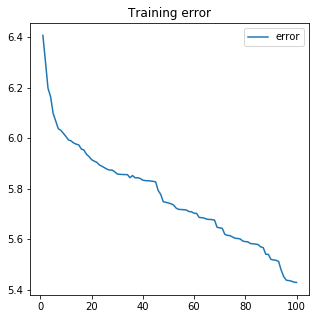

In [321]:
# Train error plot
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,sel_num+1), selected_train_error)
plt.title('Training error')
plt.legend(['error'])
plt.show()

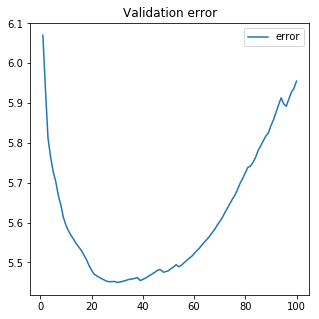

In [322]:
# Validation error plot
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,sel_num+1), selected_valid_error)
plt.title('Validation error')
plt.legend(['error'])
plt.show()

### Analyze
Write explanation of graph below. <br>
Analyze the folloing points.
* Trend of each error against number of features
* Meaning of gap between vlidation error and train error
* Meaning of each region in graph
* Others...

In [252]:
# Write description here
1. Training error 는 Feature 를 뽑을때 마다 꾸준히 감소한다. 이것은 수업에서 배운대로, dimension 이 높아지면, 무조건 training error는
감소하게 된다. 
2. Validation error 는 꾸준히 늘어나다가 30개이상 쯤부터 다시 증가하는 것을 볼 수 있다.
3. 그래프 초반 Training error 와 Validation error 보다 계속 꾸준히 감소하고 있다. 그러나 Training error 와 Validation error 가
모두 크므로, high bias 구간이다. 그래프 중간쯤에는, (30개 부근) Training error 는 어느정도 있지만, validation error 가 최소가 되었다. 
그러나 아직 Training error 가 validation error 보다 높다.
그래프 오른쪽에는 validation error 는 다시 증가하고, Training error 는 계속 감소하므로, high variance 구간으로 가고있다. 그러나,
그 중간에 Training error 가 validation error 보다 작으면서 Validation error도 여전히 적은 적절한 optimal 한 부분이 있고, 
그 것을 선택해야 우리의 최선의 모델이 된다.
4. training error 가 높은 구간은 애초에 training data set 조차도 잘 맞추지 못하므로 high bias 구간이다. 그리고 계속 감소하지만,
좋은 모델인지는 이제 validation error 를 확인해야 한다.
5. Validation error 에 대하여 Feature 의 갯수가 늘어날 수록 잘 맞추어 나가지만, 어느순간 training error 는 감소해도,
validation 은 증가하는 그 30개 이상 부분은 high variance 구간이라고 할 수 있다. 
6. Validation error 가 최소인 Feature 들을 그리디하게 추가해서 뽑았으므로, Validation error 는 꾸준히 감소하지만, 어느순간 증가하는 모습을
보인다. 그리하여 굳 100개를 뽑을 필요가 없고, 증가하는 순간 break 하는 것이 타당하지 않나? 라는 생각을 처음에 했었지만,
training error 도 꾸준하게 감소하는모습을 보이므로, 적절한 모델은 좀 더 지켜봐야 할수도 있겠다는 생각을 했다. 
greedy 한 모델이 무언가 항상 최적의 솔루션을 주진 않겠지만,
그래도 어느정도 모델선택에서 우리가 원하는 learning curve 형태를 그리므로, 괜찮은 알고리즘이라고 생각한다.
마지막으로, 나는 Validation error 는 좀 높아지지만, Training error 가 그만큼 낮아지므로, Training error < Validation error
이면서, Validation error 도 적당히 작은 77개 부근이 optimal model 이라고 생각한다.
그래서 아래에 Model selection 은 선택된 피처들 중 77개를 뽑아서 모델을 만들 것이다.

SyntaxError: invalid syntax (<ipython-input-252-cf4d707b6022>, line 2)

### 1-3. Model selection and evaluation
Select the best model and perform a test on test dataset.<br>
Print the <b>performance on test set</b> with <b>features of the best model.

In [329]:
# Select optimal feature set corresponding the minimum cross validation error
# Your code here
temp = []
optimal_selected_feature = []
for i in range(77):
    temp.append(X_dev[:,selected_feature[i]])
    optimal_selected_feature.append(selected_feature[i])

temp = np.array(temp)
X_dev_fs = temp
X_dev_fs = X_dev_fs.T
# End your code

# Basic settings. DO NOT MODIFY
min_train_error = 1000
min_valid_error = 1000
optimal_param = np.array([])

for train_index, test_index in cv.split(X_dev) :
    X_train, X_valid = X_dev_fs[train_index], X_dev_fs[test_index]
    y_train, y_valid = y_dev[train_index], y_dev[test_index]
    
    # Derive training error, validation error for each fold
    # For each fold, you need to compare error with previous minimum error.
    # Your code here
    model.fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_valid = model.predict(X_valid)
    train_error = mean_squared_error(predict_train, y_train)
    valid_error = mean_squared_error(predict_valid, y_valid)
    if valid_error < min_valid_error:
        min_valid_error = valid_error
    if train_error < min_train_error:
        min_train_error = train_error
    # End your code

# Find the best model on each fold
# Derive test error with best performance model
# Your code here
temp2 = []
for feature in optimal_selected_feature:
    temp2.append(X_test[:,feature])
    
temp2 = np.array(temp2)
X_test = temp2
X_test = X_test.T
predict_test = model.predict(X_test)
test_error = mean_squared_error(predict_test, y_test)
# End your code

# Drop features of final model
print("Results")
print("# of selected features : {}".format(len(optimal_selected_feature)))
print("Selected features : ")
print(optimal_selected_feature)

# Drop test error and accuracy
print("Training error : {}".format(min_train_error))
print("Validation error : {}".format(min_valid_error))
print("Test error : {}".format(test_error))

Results
# of selected features : 77
Selected features : 
[1, 3, 45, 109, 53, 44, 43, 116, 95, 21, 77, 80, 97, 26, 24, 36, 40, 117, 92, 84, 110, 98, 15, 6, 118, 85, 113, 0, 69, 99, 104, 31, 62, 121, 0, 35, 0, 120, 17, 42, 25, 108, 51, 14, 2, 22, 57, 81, 65, 33, 37, 30, 11, 71, 18, 50, 102, 66, 75, 46, 49, 10, 34, 100, 114, 54, 39, 7, 4, 38, 124, 5, 86, 55, 16, 27, 61]
Training error : 5.462161506808589
Validation error : 4.730789370353572
Test error : 8.413698925303905


## 2. Logistic Regression with Regularizer

In this example you will explore the effect of regularization parameter.<br>
You will use <b>'Heart Disease Dataset'</b> in <b>'LogReg'</b> for this example. <br>

The goal is to predict the presence of heart disease given attributes of a patient.<br>
The presence is integer valued from 0 (no presence) to 4, but you have to only distingush presensence (values 1,2,3,4) from absence (value 0). <br>
Each attribute is described below. <br>

> 1. age : age in years <br>
> 2. sex : sex (1 = male; 0 = female) <br>
> 3. cp : chest pain type <br>
-- Value 1: typical angina <br>
-- Value 2: atypical angina <br>
-- Value 3: non-anginal pain <br>
-- Value 4: asymptomatic  <br>
> 4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)  <br>
> 5. chol : serum cholestoral in mg/dl  <br>
> 6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
> 7. restecg  : resting electrocardiographic results <br>
-- Value 0: normal <br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
> 8. thalach : maximum heart rate achieved <br>
> 9. exang : exercise induced angina (1 = yes; 0 = no) <br>
> 10. oldpeak : ST depression induced by exercise relative to rest <br>
> 11. slope : the slope of the peak exercise ST segment <br>
-- Value 1: upsloping <br>
-- Value 2: flat <br>
-- Value 3: downsloping  <br>
> 12. ca : number of major vessels (0-3) colored by flourosopy  <br>
> 13. thal : 3 = normal; 6 = fixed defect; 7 = reversable defect  <br>


### 2-0. Preprocess

Firstly, read training, validation and test datasets respectively. <br>


In [333]:

def read_data(data_type):
    f = open('./LogReg/' + data_type + '.data', 'r')

    X, Y = [],[]
    while True:
        line = f.readline()
        if not line: break
        spl = line.split(',')
        x = spl[:-1]
        y = int(spl[-1])
    
        
        X.append(list(map(float, x)))
        
        # Define the variable 'binary_label'.
        # Note that labels must be 1 or 0.
        # Your code here
        if y == 0:
            binary_label = 1
        else :
            binary_label = 0
        Y.append(binary_label)  # blank
    
    return X, Y

X_tr, Y_tr = read_data('train')
X_va, Y_va = read_data('valid')
X_te, Y_te = read_data('test')


### Normalization and Converting to one-hot vector

Data preprocessing takes several steps after loading data. <br>
1. <b>Normailze</b> numerical values. Normalization is defined as <b><i>normalized_value</i> = (value - mean) / std</b>. <br>
   You should calculate mean and standard deviation (std) on <b> train data </b> and normalize train, valid and test data.
2. For categorical attributes, <b>build dictionaries</b> of each attribute and convert the categorical values to <b>one-hot vectors</b>. <br>
3. Concatenate all the obtained values. <br>

If you have done correctly, you will get results that are same format as below: 
* <b>before</b> : [63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0]
* <b>after</b> : [0.11099784710934087, 0, 1, 1, 0, 0, 0, 0.035386000081823056, -0.005256085700922788, 0, 1, 0, 0, 1, 0.0026598418293161848, 1, 0, 0.6659671864819814, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0] <br>
(The values in the above example can be different from actual values.)<br>

<b>Do not use any library such as sklearn.preprocessing. You can use only Numpy. </b><br>


In [334]:

# Your code here
mean = np.mean(X_tr, axis = 0)
std = np.std(X_tr, axis = 0)
def normalize(X):
    for i in range(len(X)):
        X[i][0] = (X[i][0]-mean[0])/std[0]
        X[i][3] = (X[i][3]-mean[3])/std[3]
        X[i][4] = (X[i][4]-mean[4])/std[4]
        X[i][7] = (X[i][7]-mean[7])/std[7]
        X[i][9] = (X[i][9]-mean[9])/std[9]
    return X

def oneHotEncoding(X):
    for i in range(len(X)):
        if X[i][1] == 0:
            X[i][1] = [1,0]
        elif X[i][1] == 1:
            X[i][1] = [0,1]
        if X[i][2] == 1:
            X[i][2] = [1,0,0,0]
        elif X[i][2] == 2:
            X[i][2] = [0,1,0,0]
        elif X[i][2] == 3:
            X[i][2] = [0,0,1,0]
        elif X[i][2] == 4:
            X[i][2] = [0,0,0,1]
        if X[i][5] == 0:
            X[i][5] = [1,0]
        elif X[i][5] == 1:
            X[i][5] = [0,1]
        if X[i][6] == 0:
            X[i][6] = [1,0,0]
        elif X[i][6] == 1:
            X[i][6] = [0,1,0]
        elif X[i][6] == 2:
            X[i][6] = [0,0,1]
        if X[i][8] == 0:
            X[i][8] = [1,0]
        elif X[i][8] == 1:
            X[i][8] = [0,1]
        if X[i][10] == 1:
            X[i][10] = [1,0,0]
        elif X[i][10] == 2:
            X[i][10] = [0,1,0]
        elif X[i][10] == 3:
            X[i][10] = [0,0,1]
        if X[i][11] == 0:
            X[i][11] = [1,0,0,0]
        elif X[i][11] == 1:
            X[i][11] = [0,1,0,0]
        elif X[i][11] == 2:
            X[i][11] = [0,0,1,0]
        elif X[i][11] == 3:
            X[i][11] = [0,0,0,1]
        if X[i][12] == 3:
            X[i][12] = [1,0,0]
        elif X[i][12] == 6:
            X[i][12] = [0,1,0]
        elif X[i][12] == 7:
            X[i][12] = [0,0,1]
        temp = []
        for j in range(13):
            if j == 1 or j == 2 or j == 5 or j == 6 or j == 8 or j == 10 or j == 11 or j == 12:
                for k in X[i][j]:
                    temp.append(X[i][j][k])
            else:
                temp.append(X[i][j])
        X[i] = temp
    return X

X_tr = normalize(X_tr)
X_tr = oneHotEncoding(X_tr)
X_va = normalize(X_va)
X_va = oneHotEncoding(X_va)
X_te = normalize(X_te)
X_te = oneHotEncoding(X_te)
# End your code


### 2-1. Logistic regression model and regularizer
Build logistic regression model with l2 regularization utilizing sklearn. <br>
Find the optimal coefficient based on <b>cross entropy loss</b> on thet validation set. <br>
Try following regularization parameter settings.
* Regularization parameters = 0.01, 0.05, 0.1, 0.5, 1, 10, 100 <br>
* Note that regluarization parameter for LogisticRegression in sklearn is inverse of true parameter. <br>
  (coef = 0.001 for LogisticRegression   =>  $\lambda$ = 1000 in our course note)
* Your model should be <b>LogisticRegression(C=coef, solver='lbfgs', max_iter=500). </b>
  <br>  <b>Do not change the model setting except C. </b> 
  <br> (coef = each regularization parameter)

In [335]:
# Please use below function
# logreg = LogisticRegression(C=coef, solver='lbfgs', max_iter=500)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

coefs = [0.01, 0.05, 0.1, 0.5, 1, 10, 100]

opt_coef = 1


# To plot losses on training and validation sets with varied parameter settings, 
# save them on lists.
loss_tr, loss_va = [],[]

# Your code here
min_valid_error = +1000
for coef in coefs:
    logreg = LogisticRegression(C=coef, solver='lbfgs', max_iter=500)
    logreg.fit(X_tr, Y_tr)
    predict_train = logreg.predict(X_tr)
    predict_valid = logreg.predict(X_va)
    loss_tr.append(log_loss(predict_train, Y_tr))
    loss_va.append(log_loss(predict_valid, Y_va))
    if log_loss(predict_valid, Y_va) < min_valid_error:
        min_valid_error = log_loss(predict_valid, Y_va)
        opt_coef = coef
# End your code
print(loss_tr)
print(loss_va)
print(opt_coef)



[7.024910415674479, 6.732222473301171, 6.732222473301171, 5.854097659936573, 5.854097659936573, 5.854104436185981, 5.854104436185981]
[8.925823077105475, 6.985424412280601, 6.5973392887711535, 5.433083918242809, 5.433083918242809, 4.656922655464702, 5.045007778974149]
10


### 2-2. Plot error
Plot the train and validation loss against given regularization parameter <b>(not inverse)</b>.<br>
<b> Analyze the result.

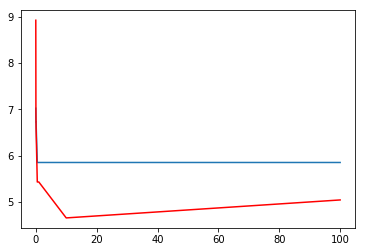

In [336]:
# Do not fix the code!!

plt.plot(coefs, loss_tr, coefs, loss_va, 'r-')
plt.show()

### Analyze 
Write explanation of graph below.

In [188]:
위 그래프에서 learning curve 가 나타난다.
validation error 는 coef 값이 증가할 수록 계속 감소하다가, 10 이 넘어가는 순간 다시 증가한다.
그 말은, 즉, coef 가 10 일때 까지는 training error 와 validation error 가 모두 높은 high bias 상태이다가, 
10 일때, optimal point 를 찍고, 다시 증가하면서, training error는 낮은 수준 유지하지만, validation error 는 높은 high variance 상태를
가지게 된다고 볼 수 있다. (coef 값이 증가할 수록 dimension은 높아진다. 위 설명에서 coef = 1/lamda 라고 했으므로)
나는 위 그래프를 토대로 coef=10 을 best model 로 사용한다.

SyntaxError: invalid syntax (<ipython-input-188-154ca4bc16ba>, line 1)

### 2-3. Model selection and evaluation

Drop the performance on test set with the regularization coefficient of the best model.

In [337]:

# Your code here
logreg = LogisticRegression(C=opt_coef, solver='lbfgs', max_iter=500)
logreg.fit(X_tr, Y_tr)
predict_test = logreg.predict(X_te)
test_loss = log_loss(predict_test, Y_te)
test_acc = (100-test_loss)/100
# End your code


#print regularization paramter of final model and drop test loss and accuracy
print ("Optimal : {}, Loss : {:2.3f}, Accuracy : {:3.2f}".format(opt_coef, test_loss, test_acc*100))

Optimal : 10, Loss : 6.140, Accuracy : 93.86
